## Overview

This worksheet explores patterns in user book reviews through text-based analysis and topic modeling. We begin with the creation of a general word cloud to understand frequently used terms across all reviews, followed by a segmentation of reviews into positive and negative categories using sentiment scores. More detailed word clouds are then generated for each sentiment group, removing generic terms to highlight meaningful emotional and thematic patterns.

To uncover deeper insights, we apply BERTopic for unsupervised topic modeling. Initially, we run a basic version of the model to identify broad themes, which results in over 300 topics. We then enhance the modeling using Sentence Transformers, UMAP, and HDBSCAN, reducing the number of topics to 141 while significantly improving topic coherence and interpretability.

Each topic is then mapped to genres, allowing us to explore how different genres contribute to review diversity.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Word Cloud Analysis
We used spaCy-based lemmatization and filtering to preprocess the review text and generate word clouds. These visualizations help us understand the most frequently used words and themes across all user reviews, segmented by sentiment.

In [ ]:
!pip install spacy wordcloud
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 85.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
df_reviews=pd.read_csv('/content/drive/MyDrive/BigData/hardcover_data_reviews.csv')

In [ ]:
df_reviews

,bookId,rating,review,genre
0,427578,1.5,How to write like Andy Weir:Problem • Humor • ...,"Science fiction, Fiction, Space, Fantasy, Dyst..."
1,427578,4.5,Jazz hands! Ryland and <spoiler>Rocky</spoiler...,"Science fiction, Fiction, Space, Fantasy, Dyst..."
2,427578,4.0,Woah! It's been a very long time since I read ...,"Science fiction, Fiction, Space, Fantasy, Dyst..."
3,427578,5.0,I wish I could rate higher than five stars!! T...,"Science fiction, Fiction, Space, Fantasy, Dyst..."
4,427578,5.0,I wasn't sure if Andy Weir could capture my im...,"Science fiction, Fiction, Space, Fantasy, Dyst..."
...,...,...,...,...
21510,433204,5.0,There are parts of this that are very academic...,"Biography, Biography & Autobiography, Philosop..."
21511,433204,5.0,Read so slowly because I was taking so many no...,"Biography, Biography & Autobiography, Philosop..."
21512,433204,4.0,3.5 While this work is entwined with numbing r...,"Biography, Biography & Autobiography, Philosop..."
21513,433204,5.0,"Summary: A personal, memoir informed, look at ...","Biography, Biography & Autobiography, Philosop..."


In [ ]:
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to lemmatize, remove stopwords and punctuation
def preprocess(text):
    doc = nlp(str(text))  # convert to string in case of NaNs
    return ' '.join([
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct and token.lemma_.isalpha()
    ])


In [ ]:
df_reviews['cleaned_review'] = df_reviews['review'].apply(preprocess)


In [ ]:
df_reviews

,bookId,rating,review,genre,cleaned_review
0,427578,1.5,How to write like Andy Weir:Problem • Humor • ...,"Science fiction, Fiction, Space, Fantasy, Dyst...",write like andy weir problem humor solution hu...
1,427578,4.5,Jazz hands! Ryland and <spoiler>Rocky</spoiler...,"Science fiction, Fiction, Space, Fantasy, Dyst...",jazz hand ryland spoiler dynamic duo age fist ...
2,427578,4.0,Woah! It's been a very long time since I read ...,"Science fiction, Fiction, Space, Fantasy, Dyst...",woah long time read sci fi story kidnap whirlw...
3,427578,5.0,I wish I could rate higher than five stars!! T...,"Science fiction, Fiction, Space, Fantasy, Dyst...",wish rate high star amazing typically like fic...
4,427578,5.0,I wasn't sure if Andy Weir could capture my im...,"Science fiction, Fiction, Space, Fantasy, Dyst...",sure andy weir capture imagination like martia...
...,...,...,...,...,...
21510,433204,5.0,There are parts of this that are very academic...,"Biography, Biography & Autobiography, Philosop...",part academic accessible seamlessly weave pers...
21511,433204,5.0,Read so slowly because I was taking so many no...,"Biography, Biography & Autobiography, Philosop...",read slowly take note return genius work incre...
21512,433204,4.0,3.5 While this work is entwined with numbing r...,"Biography, Biography & Autobiography, Philosop...",work entwine numb repetition kendi bring forwa...
21513,433204,5.0,"Summary: A personal, memoir informed, look at ...","Biography, Biography & Autobiography, Philosop...",summary personal memoir inform look difference...


In [ ]:
df_reviews.to_csv("cleaned_reviews.csv", index=False)
from google.colab import files
files.download("cleaned_reviews.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Drop NaNs and join all cleaned reviews
text = ' '.join(df_reviews['cleaned_review'].dropna())


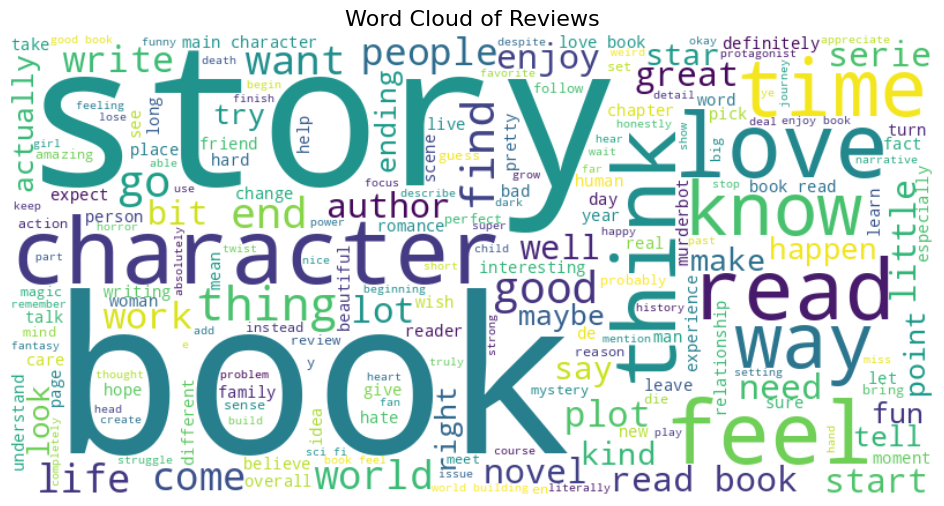

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews", fontsize=16)
plt.show()


The overall word cloud presents a comprehensive view of the language used across all user reviews, combining both positive and negative sentiments. Dominant terms like “book”, “story”, and “character” indicate a strong focus on narrative elements, which readers frequently reference regardless of sentiment. Words such as “feel”, “love”, “think”, and “know” suggest that reviews are often reflective and emotionally charged. The frequent appearance of “plot”, “author”, “time”, and “ending” reveals that structure and pacing are central to reader experiences. While some generic terms like “thing”, “way”, and “good” appear, they still reflect the varied and personal ways readers engage with books. Overall, this word cloud highlights the most recurring topics and emotional expressions found throughout the dataset.

#### Word Cloud Deep Dive

To gain deeper understanding, we segmented the reviews into **positive** and **negative** subsets based on sentiment scores and removed few generic terms as they offered limited insight into sentiment-specific patterns.


In [ ]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


In [ ]:
# Add sentiment scores
df_reviews['sentiment_score'] = df_reviews['review'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Define sentiment labels
df_reviews['sentiment_label'] = df_reviews['sentiment_score'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

df_reviews['sentiment_label'].value_counts()


,count
sentiment_label,
positive,15238
negative,3730
neutral,2547


The sentiment analysis revealed that the majority of book reviews were  positive, with approximately 69% (15,238) of the reviews falling into the positive category. In contrast, only about 17% (3,730) of the reviews were negative, while the remaining 12% (2,547) were classified as neutral. This distribution suggests that readers tend to share favorable experiences and appreciation for the books they engage with, which aligns with the highly subjective and emotionally driven nature of book reviews. These insights provided a foundation for creating more focused word clouds and interpreting thematic trends based on sentiment.


In [ ]:
positive_reviews = df_reviews[df_reviews['sentiment_label'] == 'positive']['review'].dropna().apply(preprocess)
negative_reviews = df_reviews[df_reviews['sentiment_label'] == 'negative']['review'].dropna().apply(preprocess)


In [ ]:
generic_words = set(["book", "story", "character", "read", "novel", "author", "plot", "series"])


In [ ]:
def filter_generic(text_series, generic_words):
    return ' '.join([
        word for text in text_series for word in text.split()
        if word not in generic_words
    ])


In [ ]:
# Filter text
positive_text = filter_generic(positive_reviews, generic_words)
negative_text = filter_generic(negative_reviews, generic_words)

# Generate
wc_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wc_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)


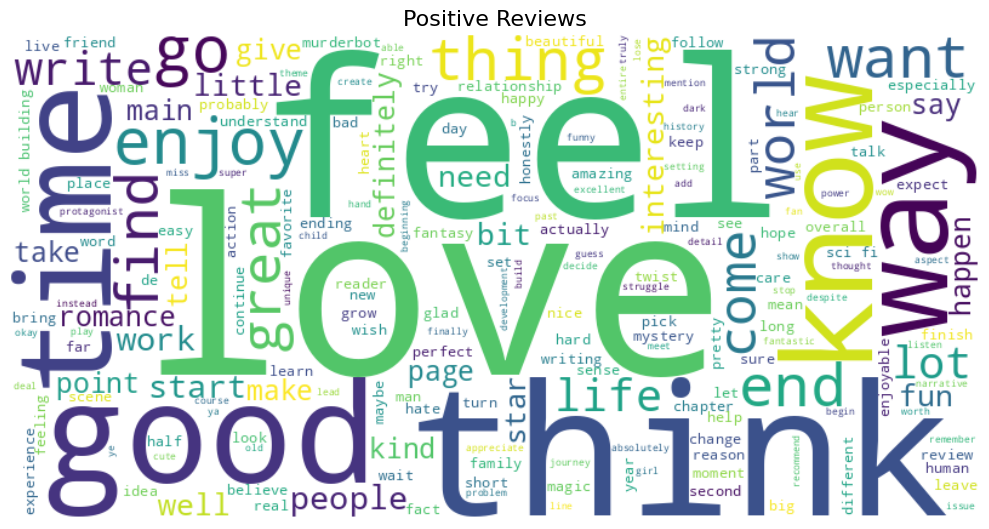

In [ ]:
#WordCloud for Positive reviews
plt.figure(figsize=(10, 8))
plt.imshow(wc_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews", fontsize=16)

plt.tight_layout()
plt.show()

The word cloud for positive reviews highlights the emotional richness and reader engagement across the dataset. Words like “love”, “feel”, “enjoy”, and “great” dominate the visualization, indicating that many readers connected deeply with the books on an emotional level. Other prominent terms such as “time”, “life”, “story”, and “world” suggest appreciation for immersive narratives and meaningful themes. The presence of words like “character”, “relationship”, “romance”, and “hope” reflects a strong emphasis on emotional arcs and human connection. Overall, this word cloud reinforces that positively rated books are often praised for their emotional impact, relatable characters, and powerful storytelling.

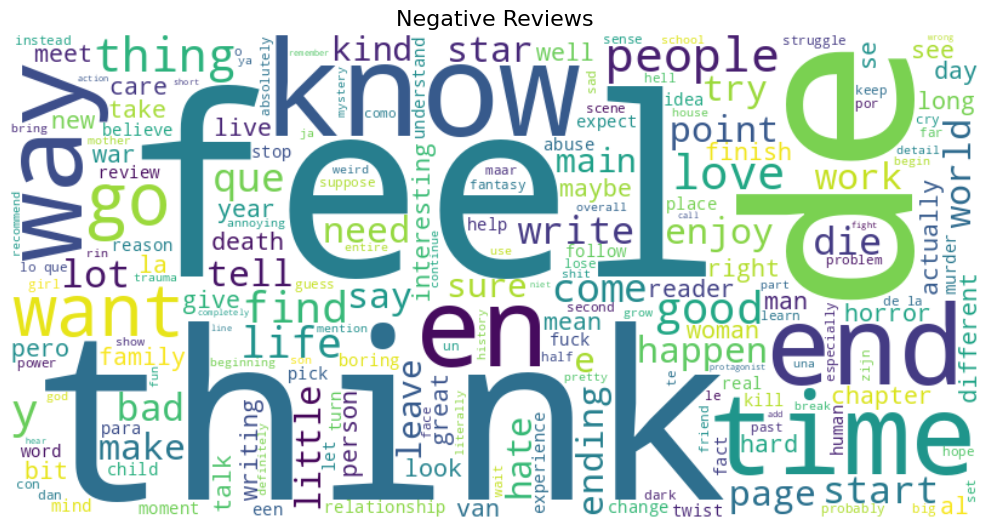

In [ ]:
#WordCloud for Negative reviews
plt.figure(figsize=(10, 8))
plt.imshow(wc_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews", fontsize=16)
plt.tight_layout()
plt.show()

The word cloud for negative reviews reveals key areas of dissatisfaction among readers. Terms like “think”, “feel”, and “want” suggest that even critical reviews are deeply personal and emotionally driven. Notably, words such as “death”, “hate”, “boring”, and “ending” appear prominently, indicating frequent disappointment with how stories conclude or handle darker themes. The presence of “leave”, “die”, and “kill” may reflect critiques related to character arcs or plot resolutions that didn’t resonate with readers. In contrast to the positive reviews, negative feedback still contains emotionally charged language like “love”, but often in contexts of unmet expectations. Overall, the word cloud suggests that negative reviews are not merely dismissive, but rather express thoughtful frustration with pacing, character decisions, or story direction.

## Topic Modelling
We applied topic modeling to uncover the dominant subjects readers discuss in their book reviews.By clustering similar reviews based on shared vocabulary and context, topic modeling helps us summarize large volumes of text efficiently,identify key themes that emerge from reader feedback and understand what readers are talking about most (e.g., character development, plot twists, emotional impact).


In [ ]:
!pip install bertopic
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

We chose **BERTopic** to identify meaningful themes across book reviews because it is highly effective at capturing the nuance and context of natural language. BERTopic uses transformer-based language models to generate semantic embeddings of text, which allows it to group similar reviews based on their deeper meaning rather than just keyword overlap.



In [ ]:
from bertopic import BERTopic
import pandas as pd


In [ ]:
docs = df_reviews['review'].dropna().tolist()


In [ ]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
info=topic_model.get_topic_info()  # Summary table
info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,7889,-1_it_was_book_this,"[it, was, book, this, the, but, and, to, that,...",[I feet a bit ashamed. I had so many issues wi...
1,0,538,0_que_de_la_el,"[que, de, la, el, es, lo, un, en, libro, con]",[Estuvo predecible muchas veces pero me ha gus...
2,1,519,1_stars_star_35_45,"[stars, star, 35, 45, rating, it, me, was, sta...",[It was going so well - But the ending was so ...
3,2,393,2_murderbot_murderbots_humans_wells,"[murderbot, murderbots, humans, wells, diaries...",[Who doesn't love Murderbot? I love Murderbot....
4,3,348,3_35_45_rounded_it,"[35, 45, rounded, it, really, but, was, didnt,...",[3.5 Rounded to a 4.I absolutely love this ser...
...,...,...,...,...,...
309,308,10,308_tenderhearted_unsettling_poetic_fragility,"[tenderhearted, unsettling, poetic, fragility,...",[WOW. WOOOOOW. THIS MIGHT BE MY FAVORITE BOOK ...
310,309,10,309_disarray_ohh_typewriter_verbose,"[disarray, ohh, typewriter, verbose, reids, ho...",[This story left me in disarray. I can't wait ...
311,310,10,310_mia_richardson_mrs_ng,"[mia, richardson, mrs, ng, pearl, richardsons,...","[I thought Little Fires Everywhere, by Celeste..."
312,311,10,311_att_den_inte_och,"[att, den, inte, och, jag, fr, vacker, med, ha...",[Det roliga med Millers ”Circe” är att jag äls...


In [ ]:
 print(f"The model created {len(info)} topics")

The model created 314 topics


In [ ]:
info.sort_values(by='Count', ascending=False).head(10)


,Topic,Count,Name,Representation,Representative_Docs
0,-1,7889,-1_it_was_book_this,"[it, was, book, this, the, but, and, to, that,...",[I feet a bit ashamed. I had so many issues wi...
1,0,538,0_que_de_la_el,"[que, de, la, el, es, lo, un, en, libro, con]",[Estuvo predecible muchas veces pero me ha gus...
2,1,519,1_stars_star_35_45,"[stars, star, 35, 45, rating, it, me, was, sta...",[It was going so well - But the ending was so ...
3,2,393,2_murderbot_murderbots_humans_wells,"[murderbot, murderbots, humans, wells, diaries...",[Who doesn't love Murderbot? I love Murderbot....
4,3,348,3_35_45_rounded_it,"[35, 45, rounded, it, really, but, was, didnt,...",[3.5 Rounded to a 4.I absolutely love this ser...
5,4,233,4_series_sequel_trilogy_wait,"[series, sequel, trilogy, wait, third, one, th...","[This one was the best in the series, Love thi..."
6,5,203,5_audiobook_audio_listened_listening,"[audiobook, audio, listened, listening, listen...",[I think I had a bit of a better experience th...
7,6,195,6_het_een_ik_van,"[het, een, ik, van, en, dat, boek, maar, niet,...",[Juli was een beetje een kwakkelende maand wat...
8,7,152,7_king_stephen_kings_his,"[king, stephen, kings, his, horror, billy, ins...",[Everyone has that one author that they are ea...
9,8,151,8_romance_lovers_aaron_enemies,"[romance, lovers, aaron, enemies, relationship...","[i love romance and love actually, Moderate sp..."


### Initial Topic Modeling on Full Review Set

With BERTopic, we identified 314 unique topics in over 21,000 book reviews. Some of the key findings of the most common top 10 topics are as follows:

1. **Topic -1: Generic Reviews**
With 7,889 reviews, this top cluster consists of filler or inaccurate content (e.g., "It was book, this, the."), characteristic of low-information reviews which were not clusterable in any meaningful way. This is typical with BERTopic and constitutes a "miscellaneous" or unclustered cluster.

2. **Topic 0: Spanish Reviews**
This cluster (538 reviews) consists entirely of Spanish-language reviews, indicating the multilingual character of the dataset. Adding non-English content to the model helped bring out novel language-specific opinions.

3. **Topic 1: Star Rating Conversations**
Focused around keywords such as "stars", "35", "45", and "rating", this subject summarizes readers explicitly sharing how they calculated their scores — usually entailing fractional ratings or rating conundrums.

4. **Topic 2: Murderbot Series**
With 393 reviews, this group is all about the best-selling *Murderbot Diaries* by Martha Wells. Fans employ words like "Murderbot" and humanity and technology topics, with a high exhibition of engagement with the series.

5. **Topic 3: Rounded Ratings with Enthusiasm**
Similar to Topic 1 but more emotionally charged, this group contains reviews where readers rounded up their ratings (e.g., "3.5 rounded to 4") and emphasized how much they loved the book in spite of flaws.

6. **Topic 4: Series & Sequels**
Reviews here employ the terms "series", "sequel", "trilogy", and "wait", suggesting binge reading interest, unfinished series, or reader waiting for the next book — a genre fiction activity.

7. **Topic 5: Audiobook Experiences**
This cluster suggests listening-focused reading activities, with keywords including "audiobook", "listened", and "narrator". Readers are likely to remark on whether the narration enhanced or detracted from the experience.

8. **Topic 6: Dutch Reviews**  
   Reviews in this topic contain Dutch-language keywords (e.g., "het", "een", "boek"), evidencing more multilingual representation, which could warrant translation or language-dependent modeling.

9. **Topic 7: Stephen King Fans**  
   A fan-oriented cluster referring to "Stephen" and "King", implying reviews of books by Stephen King. The exemplar review evinces deep author allegiance and topical appeal.

10. **Topic 8: Romance & Tropes**
    Highlighting romance as the topic of interest, this set of words uses terms like "romance", "lovers", "enemies", and "relationship", which are tell-tale signs that folks are discussing character interactions, tropes, and emotional arcs.

These clusters give a mix of **genre-based**, **format-based**, **language-based**, and **author-specific** data.



In [ ]:
!pip install bertopic umap-learn sentence-transformers hdbscan


### Enhanced Topic Modeling with Sentence Transformers and UMAP

To improve the quality and coherence of topics generated, we upgraded our BERTopic pipeline by integrating Sentence Transformers for high-dimensional semantic embeddings and UMAP (Uniform Manifold Approximation and Projection)for dimensionality reduction. Sentence Transformers allowed us to capture deeper contextual meaning from reviews, leading to more accurate clustering of similar themes. UMAP, in turn, helped visualize and separate these clusters in a lower-dimensional space while preserving their semantic relationships.

In [ ]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")


In [ ]:
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
hdbscan_model = HDBSCAN(min_cluster_size=30, metric='euclidean', cluster_selection_method='eom')


In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    calculate_probabilities=False
)


In [ ]:
docs = df_reviews['review'].dropna().tolist()
topics, _ = topic_model.fit_transform(docs)


In [ ]:
# Filter original df to match what you passed to BERTopic
review_df = df_reviews[df_reviews['review'].notna()].copy()
review_df['dominant_topic'] = topics
review_df['genre_list'] = review_df['genre'].astype(str).str.split(',\s*')


In [ ]:
exploded_df = review_df.explode('genre_list')


In [ ]:
# Grouping the exploded dataframe by topic and genre, counting occurrences of each genre per topic.
# This creates a matrix where rows are topics and columns are genres, with values as the number of reviews.
topic_genre_counts = exploded_df.groupby(['dominant_topic', 'genre_list']).size().unstack(fill_value=0)
topic_genre_counts.head()


genre_list,Ability,Abuse of administrative power,Abusive men,Action,Adult Fiction,Adventure,African Americans,Air pilots,Aliens,American,...,photography,political science,psychological fiction,religious,sapphic,science fantasy,social science,speculative fiction,surrealism,witches
dominant_topic,,,,,,,,,,,,,,,,,,,,,
-1,41,15,29,47,23,3860,117,13,699,0,...,115,40,49,47,12,48,83,35,64,47
0,0,0,0,5,1,255,0,4,33,2,...,7,0,0,0,0,1,0,1,1,2
1,1,0,0,2,2,224,7,1,36,0,...,6,1,0,0,0,2,0,2,3,1
2,1,0,0,2,3,333,0,3,82,0,...,0,0,1,0,3,4,0,0,0,0
3,0,0,0,5,4,167,1,0,21,0,...,5,0,4,2,0,1,0,1,6,5


In [ ]:
# Calculating the proportion of each genre within a topic row-wise.
# This gives a normalized view showing what percentage of a topic is associated with each genre.
topic_genre_pct = topic_genre_counts.div(topic_genre_counts.sum(axis=1), axis=0)
topic_genre_pct

genre_list,Ability,Abuse of administrative power,Abusive men,Action,Adult Fiction,Adventure,African Americans,Air pilots,Aliens,American,...,photography,political science,psychological fiction,religious,sapphic,science fantasy,social science,speculative fiction,surrealism,witches
dominant_topic,,,,,,,,,,,,,,,,,,,,,
-1,0.000709,0.000259,0.000502,0.000813,0.000398,0.066757,0.002023,0.000225,0.012089,0.000000,...,0.001989,0.000692,0.000847,0.000813,0.000208,0.000830,0.001435,0.000605,0.001107,0.000813
0,0.000000,0.000000,0.000000,0.001486,0.000297,0.075780,0.000000,0.001189,0.009807,0.000594,...,0.002080,0.000000,0.000000,0.000000,0.000000,0.000297,0.000000,0.000297,0.000297,0.000594
1,0.000314,0.000000,0.000000,0.000627,0.000627,0.070241,0.002195,0.000314,0.011289,0.000000,...,0.001881,0.000314,0.000000,0.000000,0.000000,0.000627,0.000000,0.000627,0.000941,0.000314
2,0.000322,0.000000,0.000000,0.000644,0.000966,0.107177,0.000000,0.000966,0.026392,0.000000,...,0.000000,0.000000,0.000322,0.000000,0.000966,0.001287,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.001965,0.001572,0.065619,0.000393,0.000000,0.008251,0.000000,...,0.001965,0.000000,0.001572,0.000786,0.000000,0.000393,0.000000,0.000393,0.002358,0.001965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
136,0.000000,0.000000,0.000000,0.000000,0.000000,0.108527,0.000000,0.000000,0.050388,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
137,0.000000,0.000000,0.000000,0.005747,0.000000,0.074713,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.005747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Finding the genre with the highest percentage for each topic.
# We create a dictionary mapping each topic to its dominant genre.
topic_genre_labels = topic_genre_pct.idxmax(axis=1).to_dict()
topic_genre_labels

{-1: 'Fiction',
 0: 'Fiction',
 1: 'Fiction',
 2: 'Fiction',
 3: 'Fiction',
 4: 'Fiction',
 5: 'Fiction',
 6: 'Fiction',
 7: 'Fiction',
 8: 'Fiction',
 9: 'Fiction',
 10: 'Fiction',
 11: 'Fiction',
 12: 'Fiction',
 13: 'Fantasy',
 14: 'Fiction',
 15: 'Fiction',
 16: 'Fiction',
 17: 'Fiction',
 18: 'Fiction',
 19: 'Fiction',
 20: 'Fantasy',
 21: 'Fiction',
 22: 'Fiction',
 23: 'Fiction',
 24: 'Fantasy',
 25: 'Fiction',
 26: 'Fiction',
 27: 'Fiction',
 28: 'Biography',
 29: 'Fantasy',
 30: 'Fiction',
 31: 'Fiction',
 32: 'Fiction',
 33: 'Fiction',
 34: 'Fantasy',
 35: 'Fiction',
 36: 'Fiction',
 37: 'Fiction',
 38: 'Fiction',
 39: 'Fiction',
 40: 'Fiction',
 41: 'Fiction',
 42: 'Fantasy',
 43: 'Fiction',
 44: 'Adventure',
 45: 'Fiction',
 46: 'Adventure',
 47: 'Fiction',
 48: 'Fiction',
 49: 'Fiction',
 50: 'Fiction',
 51: 'Fiction',
 52: 'Fiction',
 53: 'Fiction',
 54: 'Fiction',
 55: 'Fantasy',
 56: 'Fantasy',
 57: 'Fiction',
 58: 'Fiction',
 59: 'Fiction',
 60: 'Fiction',
 61: 'Fictio

In [ ]:
# Mapping the dominant genre back to the original review-level dataframe.
# This creates a new column in the review_df that labels each review with its topic's main genre.
review_df['topic_genre'] = review_df['dominant_topic'].map(topic_genre_labels)


In [ ]:
review_df

,bookId,rating,review,genre,cleaned_review,sentiment_score,sentiment_label,dominant_topic,genre_list,topic_genre
0,427578,1.5,How to write like Andy Weir:Problem • Humor • ...,"Science fiction, Fiction, Space, Fantasy, Dyst...",write like andy weir problem humor solution hu...,0.9559,positive,-1,"[Science fiction, Fiction, Space, Fantasy, Dys...",Fiction
1,427578,4.5,Jazz hands! Ryland and <spoiler>Rocky</spoiler...,"Science fiction, Fiction, Space, Fantasy, Dyst...",jazz hand ryland spoiler dynamic duo age fist ...,0.9848,positive,-1,"[Science fiction, Fiction, Space, Fantasy, Dys...",Fiction
2,427578,4.0,Woah! It's been a very long time since I read ...,"Science fiction, Fiction, Space, Fantasy, Dyst...",woah long time read sci fi story kidnap whirlw...,0.8718,positive,25,"[Science fiction, Fiction, Space, Fantasy, Dys...",Fiction
3,427578,5.0,I wish I could rate higher than five stars!! T...,"Science fiction, Fiction, Space, Fantasy, Dyst...",wish rate high star amazing typically like fic...,0.9867,positive,1,"[Science fiction, Fiction, Space, Fantasy, Dys...",Fiction
4,427578,5.0,I wasn't sure if Andy Weir could capture my im...,"Science fiction, Fiction, Space, Fantasy, Dyst...",sure andy weir capture imagination like martia...,0.9681,positive,81,"[Science fiction, Fiction, Space, Fantasy, Dys...",Adventure
...,...,...,...,...,...,...,...,...,...,...
21510,433204,5.0,There are parts of this that are very academic...,"Biography, Biography & Autobiography, Philosop...",part academic accessible seamlessly weave pers...,-0.9253,negative,-1,"[Biography, Biography & Autobiography, Philoso...",Fiction
21511,433204,5.0,Read so slowly because I was taking so many no...,"Biography, Biography & Autobiography, Philosop...",read slowly take note return genius work incre...,-0.2426,negative,-1,"[Biography, Biography & Autobiography, Philoso...",Fiction
21512,433204,4.0,3.5 While this work is entwined with numbing r...,"Biography, Biography & Autobiography, Philosop...",work entwine numb repetition kendi bring forwa...,0.0258,neutral,-1,"[Biography, Biography & Autobiography, Philoso...",Fiction
21513,433204,5.0,"Summary: A personal, memoir informed, look at ...","Biography, Biography & Autobiography, Philosop...",summary personal memoir inform look difference...,-0.9976,negative,-1,"[Biography, Biography & Autobiography, Philoso...",Fiction


In [ ]:
# Count unique topics for each genre
genre_topic_counts = exploded_df.groupby('genre_list')['dominant_topic'].nunique().sort_values(ascending=False)


In [ ]:
genre_topic_counts

,dominant_topic
genre_list,
Fiction,139
Fantasy,130
Young Adult,126
Adventure,120
Romance,117
...,...
Destiny,6
Health & Fitness,6
American,4


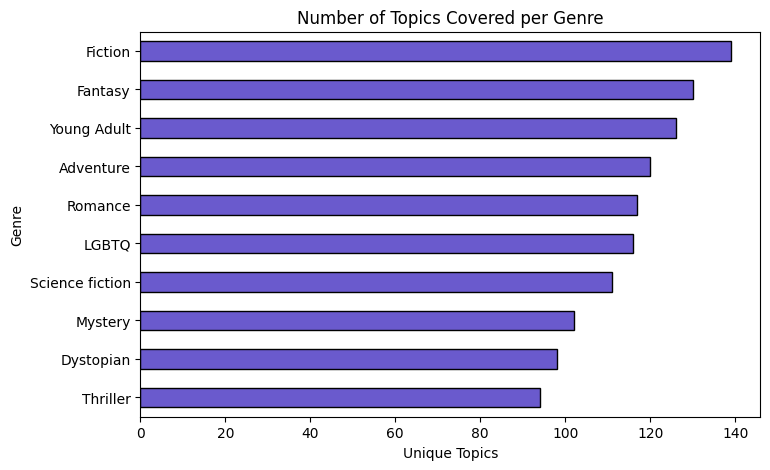

In [ ]:
import matplotlib.pyplot as plt

genre_topic_counts.head(10).plot(kind='barh', figsize=(8, 5), color='slateblue', edgecolor='black')
plt.title("Number of Topics Covered per Genre")
plt.xlabel("Unique Topics")
plt.ylabel("Genre")
plt.gca().invert_yaxis()  # to show the highest on top
plt.show()


The number of topics covered per genre closely aligns with the top 15 genres identified during our initial exploratory data analysis (EDA). Genres like Fiction, Fantasy, Young Adult, Adventure, and Romance, which were most prevalent in the dataset, also exhibit the highest topic diversity in our BERTopic results.

This consistency serves as a form of validation, indicating that not only are these genres the most frequently published or read, but they also inspire the richest and most varied conversations among readers. It reinforces the representativeness of our dataset and the effectiveness of topic modeling in surfacing meaningful narrative themes across genres.


In [ ]:
document_info = topic_model.get_document_info(docs)
document_info

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,How to write like Andy Weir:Problem • Humor • ...,-1,-1_the_it_and_to,"[the, it, and, to, this, of, was, book, that, ...",[Let me just start off by saying that if I wou...,the - it - and - to - this - of - was - book -...,0.000000,False
1,Jazz hands! Ryland and <spoiler>Rocky</spoiler...,-1,-1_the_it_and_to,"[the, it, and, to, this, of, was, book, that, ...",[Let me just start off by saying that if I wou...,the - it - and - to - this - of - was - book -...,0.000000,False
2,Woah! It's been a very long time since I read ...,25,25_mystery_murder_was_it,"[mystery, murder, was, it, this, mysteries, re...",[It was everything I didn't know I wanted in a...,mystery - murder - was - it - this - mysteries...,0.758777,False
3,I wish I could rate higher than five stars!! T...,1,1_stars_star_it_rating,"[stars, star, it, rating, was, but, book, me, ...",[3.5 stars. It's kind of like a little histori...,stars - star - it - rating - was - but - book ...,0.558546,False
4,I wasn't sure if Andy Weir could capture my im...,81,81_hail_mary_martian_weir,"[hail, mary, martian, weir, project, artemis, ...","[To provide perspective, I loved The Martian a...",hail - mary - martian - weir - project - artem...,0.959832,False
...,...,...,...,...,...,...,...,...
21506,There are parts of this that are very academic...,-1,-1_the_it_and_to,"[the, it, and, to, this, of, was, book, that, ...",[Let me just start off by saying that if I wou...,the - it - and - to - this - of - was - book -...,0.000000,False
21507,Read so slowly because I was taking so many no...,-1,-1_the_it_and_to,"[the, it, and, to, this, of, was, book, that, ...",[Let me just start off by saying that if I wou...,the - it - and - to - this - of - was - book -...,0.000000,False
21508,3.5 While this work is entwined with numbing r...,-1,-1_the_it_and_to,"[the, it, and, to, this, of, was, book, that, ...",[Let me just start off by saying that if I wou...,the - it - and - to - this - of - was - book -...,0.000000,False
21509,"Summary: A personal, memoir informed, look at ...",-1,-1_the_it_and_to,"[the, it, and, to, this, of, was, book, that, ...",[Let me just start off by saying that if I wou...,the - it - and - to - this - of - was - book -...,0.000000,False


In [ ]:
topic_info=topic_model.get_topic_info()
topic_info


,Topic,Count,Name,Representation,Representative_Docs
0,-1,9325,-1_the_it_and_to,"[the, it, and, to, this, of, was, book, that, ...",[Let me just start off by saying that if I wou...
1,0,525,0_que_de_la_el,"[que, de, la, el, es, en, lo, un, libro, los]","[“Todo fue real; inconcebiblemente real, infin..."
2,1,512,1_stars_star_it_rating,"[stars, star, it, rating, was, but, book, me, ...",[3.5 stars. It's kind of like a little histori...
3,2,419,2_series_sequel_trilogy_first,"[series, sequel, trilogy, first, book, this, o...","[This one was the best in the series, Prequels..."
4,3,416,3_rounded_it_was_but,"[rounded, it, was, but, read, so, really, book...",[4.5/5 starsI really liked this story and look...
...,...,...,...,...,...
136,135,32,135_vanessa_strane_abuse_she,"[vanessa, strane, abuse, she, her, teacher, vi...",[This was a difficult read. There were moments...
137,136,31,136_zhu_zetian_chinese_widow,"[zhu, zetian, chinese, widow, china, of, the, ...",[It's probably a 4.5 but I'm definitely roundi...
138,137,31,137_25_foarte_cute_lisa,"[25, foarte, cute, lisa, jewell, seven, love, ...","[4.5⭐️ i love you Lisa Jewell, 4.25⭐️, 4.25⭐️ ..."
139,138,30,138_ich_und_das_buch,"[ich, und, das, buch, ist, nicht, es, mich, ei...","[4⭑ Ich mochte das Buch super gerne , der Schr..."


In [ ]:
topic_info.sort_values(by='Count', ascending=False).head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,9325,-1_the_it_and_to,"[the, it, and, to, this, of, was, book, that, ...",[Let me just start off by saying that if I wou...
1,0,525,0_que_de_la_el,"[que, de, la, el, es, en, lo, un, libro, los]","[“Todo fue real; inconcebiblemente real, infin..."
2,1,512,1_stars_star_it_rating,"[stars, star, it, rating, was, but, book, me, ...",[3.5 stars. It's kind of like a little histori...
3,2,419,2_series_sequel_trilogy_first,"[series, sequel, trilogy, first, book, this, o...","[This one was the best in the series, Prequels..."
4,3,416,3_rounded_it_was_but,"[rounded, it, was, but, read, so, really, book...",[4.5/5 starsI really liked this story and look...
5,4,396,4_ending_was_but_it,"[ending, was, but, it, end, the, really, didn,...","[what an ending!, what is this ending, That en..."
6,5,384,5_murderbot_humans_wells_series,"[murderbot, humans, wells, series, its, novell...",[Who doesn't love Murderbot? I love Murderbot....
7,6,335,6_sanderson_cosmere_stormlight_mistborn,"[sanderson, cosmere, stormlight, mistborn, bra...","[3/5Hmm, did not anticipate my rating being th..."
8,7,300,7_audiobook_audio_listened_listening,"[audiobook, audio, listened, listening, listen...",[I think I had a bit of a better experience th...
9,8,221,8_het_een_ik_en,"[het, een, ik, en, van, dat, de, boek, maar, te]",[Juli was een beetje een kwakkelende maand wat...


In [ ]:
 print(f"The model created {len(topic_info)} topics")


The model created 141 topics


In [ ]:
print(f"{(1 - ((len(document_info[document_info['Topic'] == -1])) / len(document_info))) * 100:.2f}% of the documents were assigned to a topic")

56.65% of the documents were assigned to a topic



This means that over half of the dataset contained meaningful, pattern-rich content that could be grouped with similar reviews into distinct thematic clusters.


### Refined Topic Modeling Insights

After enhancing the topic modeling pipeline with Sentence Transformers, UMAP, and HDBSCAN, the number of topics reduced from 314 to 141, resulting in more coherent and interpretable clusters.

1. **Topic -1: Generic Reviews (9,325 reviews)**
   This large cluster still contains generic, low-information reviews with common terms like "the", "it", and "was". It is a reflection of broadly written or ambiguous reviews that were not part of focused clusters.

2. **Topic 0: Spanish-Language Reviews (525 reviews)**
Reviews here contain Spanish words like "que", "libro", and "los", indicating a distinctive multilingual user base. This topic recognizes the global user base reading books in languages other than English.

3. **Topic 1: Star Rating Reflections (512 reviews)**
This group is devoted to reviews discussing star ratings, with much debate between values like 3.5 or 4. The tone is suggestive of implicit reader feedback concerning expectations, disappointment, or partial satisfaction.

4. **Topic 2: Series and Sequels (419 reviews)**
Readers in this cluster talk about book series, sequels, and trilogies. The topic suggests regular exposure to long storytelling and returning characters — typical of fantasy or sci-fi series.

5. **Topic 3: Rounded Scores + Enthusiastic Praise (416 reviews)**
   Reviews in this category include phrases like "rounded it to." and express heightened emotional reactions, indicating thoughtful but passionate reader responses.

6. **Topic 4: Plot Endings (396 reviews)**
   A strong focus on book endings — disappointing or satisfying. Typical phrases include "what an ending" and "didn't expect that", suggesting twisty plots or cliffhangers.

7. **Topic 5: Murderbot Series (384 reviews)**
Still ongoing from past modeling, this cluster is dedicated to Martha Wells' *Murderbot Diaries*. That such a book-specific topic arises indicates a very active fan base.

8. **Topic 6: Brandon Sanderson Books (335 reviews)**
   This cluster includes terms "Sanderson", "Cosmere", "Stormlight", and "Mistborn" — clear indications that readers are discussing Brandon Sanderson's fantasy world.

9. **Topic 7: Audiobook Experiences (300 reviews)**
Reviews in this topic highlight the consumption mode, with a focus on audiobooks, narrators, and listening experience — demonstrating how format influences reader reception.

10. **Topic 8: Dutch Reviews (221 reviews)**
   This topic is comprised of Dutch-language reviews, reflecting linguistic diversity in the dataset. Similar to Topic 0, it demonstrates the value of multilingual topic detection.

These advanced clusters are more targeted, emotional, and author/series-specific — a huge leap from the previous model. They offer actionable intelligence in terms of measuring reader sentiment, book popularity, and cross-cultural appeal.
